# Visualize Saved Retinal Patches
Use the helper below to convert the serialized single-channel pickle files back into viewable uint8 images/masks, display them inline, or optionally export PNG copies.

In [ ]:
from pathlib import Path
import pickle
from typing import Optional, Tuple

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


def load_single_channel_pkl(pkl_path: Path, normalize: bool = True) -> np.ndarray:
    """Return a uint8 grayscale image from a pickled (1, H, W) tensor/array."""
    pkl_path = Path(pkl_path)
    if not pkl_path.exists():
        raise FileNotFoundError(f"Missing file: {pkl_path}")
    with pkl_path.open("rb") as handle:
        array = np.array(pickle.load(handle))
    if array.ndim == 3 and array.shape[0] == 1:
        array = array.squeeze(0)
    if array.ndim != 2:
        raise ValueError(f"Expected 2D grayscale data, got shape {array.shape}")
    array = array.astype(np.float32)
    if normalize:
        array -= array.min()
        max_val = array.max()
        if max_val > 0:
            array /= max_val
        array *= 255.0
    return np.clip(array, 0, 255).astype(np.uint8)


def save_png(image: np.ndarray, out_path: Path) -> None:
    """Persist a uint8 grayscale array as PNG."""
    out_path = Path(out_path)
    out_path.parent.mkdir(parents=True, exist_ok=True)
    Image.fromarray(image).save(out_path)


def display_pair(img_pkl: Path, mask_pkl: Path, figsize: Tuple[int, int] = (8, 4),
                 normalize: bool = True, save_dir: Optional[Path] = None) -> None:
    """Show an image/mask pair and optionally export PNG copies."""
    img = load_single_channel_pkl(img_pkl, normalize)
    mask = load_single_channel_pkl(mask_pkl, normalize)

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    axes[0].imshow(img, cmap="gray")
    axes[0].set_title("Image")
    axes[0].axis("off")

    axes[1].imshow(mask, cmap="gray")
    axes[1].set_title("Mask")
    axes[1].axis("off")
    plt.tight_layout()
    plt.show()

    if save_dir:
        save_dir = Path(save_dir)
        save_png(img, save_dir / f"{Path(img_pkl).stem}.png")
        save_png(mask, save_dir / f"{Path(mask_pkl).stem}.png")


def get_patch_pair(folder: Path, index: int) -> Tuple[Path, Path]:
    """Return img/mask pickle paths for a given numeric index."""
    folder = Path(folder)
    img_path = folder / f"img_patch_{index}.pkl"
    mask_path = folder / f"gt_patch_{index}.pkl"
    
    #img_path = folder / f"img_patch_{index}.pkl"
    #mask_path = folder / f"gt_patch_{index}.pkl"
    return img_path, mask_path

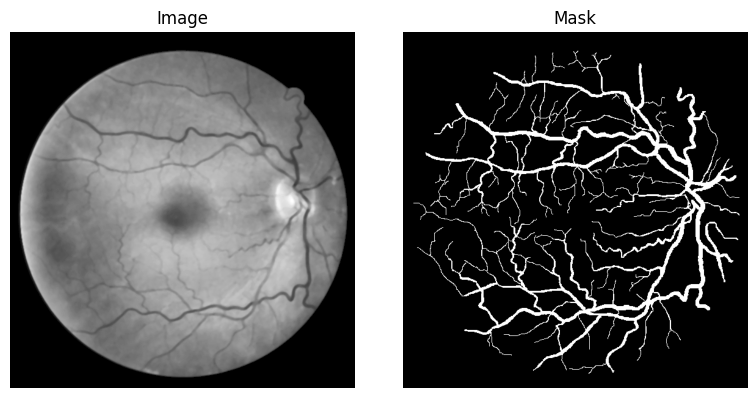

In [ ]:
# Example: update the folder/index below to inspect a specific pair
# data_folder should point to the directory that contains the img_patch_*.pkl and gt_patch_*.pkl files.
# For instance: Path("datasets/ALL/training_pro")

data_folder = Path("D:/DRIVE/FINAL FINAL DATASET CONSOLIDATED/training_pro")
patch_index = 2  # change to whichever patch you want to inspect

img_pkl, mask_pkl = get_patch_pair(data_folder, patch_index)
display_pair(img_pkl, mask_pkl, save_dir=Path("preview_pngs"))